In [25]:
import rnn, vae, config
import torch
import numpy as np
import matplotlib.pyplot as plt
import train_rnn
import train_vae
import json

In [28]:
import os
for random_index in range(20,25):
    for lambda_sv_i, lambda_sv in enumerate([0.0, 5.0, 10.0, 20.0]):
        color = ["black", "blue", "orange", "red"][lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = True
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        last_epoch = 0
        for file in os.listdir(f"data/rnn{rnn_id}/"):
            if file.startswith("rnn_model_epoch") and file.endswith(".pt"):
                epoch_num = int(file.split("epoch")[1].split(".")[0])
                if epoch_num > last_epoch:
                    last_epoch = epoch_num
        print(lambda_sv, random_index, last_epoch)

0.0 20 100
5.0 20 200
10.0 20 150
20.0 20 250
0.0 21 50
5.0 21 100
10.0 21 250
20.0 21 250
0.0 22 250
5.0 22 100
10.0 22 250
20.0 22 100
0.0 23 150
5.0 23 200
10.0 23 200
20.0 23 200
0.0 24 100
5.0 24 100
10.0 24 150
20.0 24 150


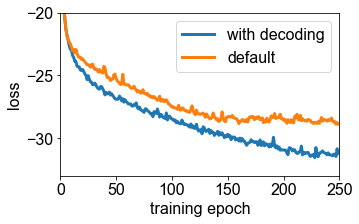

In [14]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

state_vars_to_predict=[9, 10, 11]
detach_gradients = True
truncate_at_batch = 40
use_layernorm = True
random_index = 1
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
dim_latent_z = 8
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="with decoding")

state_vars_to_predict=[]
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="default")

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("loss")
plt.show()

No handles with labels found to put in legend.


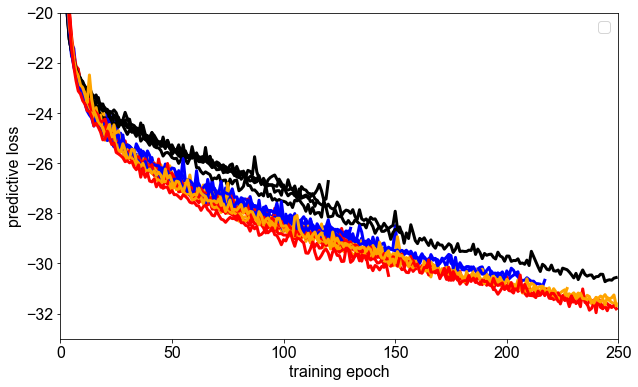

In [29]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for random_index in range(20,25):
    for lambda_sv_i, lambda_sv in enumerate([0.0, 5.0, 10.0, 20.0]):
        color = ["black", "blue", "orange", "red"][lambda_sv_i]
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = True
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        random_index = random_index
        lambda_sv = lambda_sv
        dim_latent_z = 8
        if lambda_sv == 0: state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict)>0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"

        with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
            rnn_meta = json.loads(in_file.read())
        losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
        plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, color=color, label=f"la={lambda_sv}" if random_index==0 else None)

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("predictive loss")
plt.show()

In [18]:
losses_store.shape

(250, 40, 4)

In [16]:
std_losses.shape

(250, 4)

/var/folders/47/5g669ycs2t17c0kkg2_np43m0000gn/T/ipykernel_5633/1946110728.py:38: RuntimeWarning: Mean of empty slice
  mean_losses = np.nanmean(all_losses, axis=0)
/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


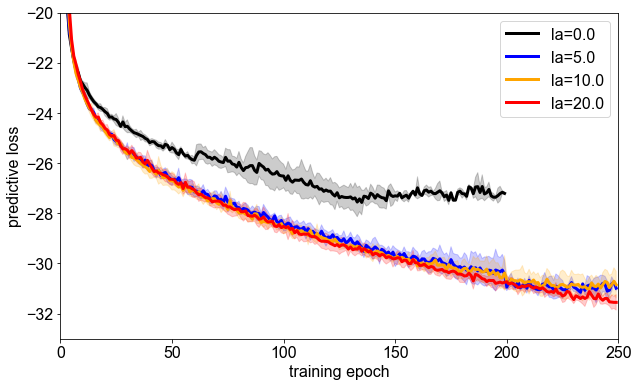

In [20]:
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})

plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for lambda_sv_i, lambda_sv in enumerate([0.0, 5.0, 10.0, 20.0]):
    color = ["black", "blue", "orange", "red"][lambda_sv_i]
    
    all_losses = []
    for random_index in range(5):
        state_vars_to_predict = [9, 10, 11]
        detach_gradients = False
        use_layernorm = True
        truncate_at_batch = 40
        n_hidden = 128
        train_epochs = 250
        save_every_epochs = 50
        max_gradient_norm = 100.0
        lr = 0.001
        dim_latent_z = 8
        
        if lambda_sv == 0:
            state_vars_to_predict = []
        
        sv_str = 'x'.join([str(x) for x in state_vars_to_predict]) if len(state_vars_to_predict) > 0 else 'X'
        rnn_id = f"_ln{1 if use_layernorm else 0}_nh{n_hidden}_dlz{dim_latent_z}_mgn{max_gradient_norm}_lr{lr}" + \
                 f"_dg{1 if detach_gradients else 0}_da{truncate_at_batch}_sv{sv_str}_lsv{lambda_sv}_r{random_index}"
        
        with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
            rnn_meta = json.loads(in_file.read())
        
        losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
        all_losses.append(np.mean(losses_store, axis=1)[:, 0])
    
    all_losses = np.array(all_losses)
    mean_losses = np.nanmean(all_losses, axis=0)
    std_losses = np.nanstd(all_losses, axis=0)
    
    plt.plot(mean_losses, linewidth=3, color=color, label=f"la={lambda_sv}")
    plt.fill_between(range(len(mean_losses)), mean_losses - std_losses, mean_losses + std_losses, color=color, alpha=0.2)

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("predictive loss")
plt.show()

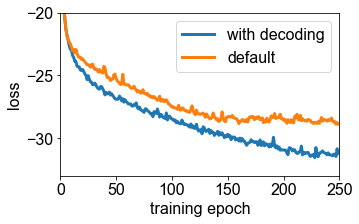

In [13]:
plt.rcParams.update({'font.family': 'Arial', 'font.size': 16})
plt.figure(figsize=(5, 3))  # Adjust the figure size as needed

state_vars_to_predict=[9, 10, 11]
detach_gradients = True
truncate_at_batch = 40
use_layernorm = True
random_index = 1
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
dim_latent_z = 8
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="with decoding")

state_vars_to_predict=[]
rnn_id = f"dg{1 if detach_gradients else 0}_ln{1 if use_layernorm else 0}_da{truncate_at_batch}_dv{len(state_vars_to_predict)}_r{random_index}"
with open(f'data/rnn{rnn_id}/rnn_meta.json', "r") as in_file:
    rnn_meta = json.loads(in_file.read())
losses_store = np.load(f'data/rnn{rnn_id}/rnn_losses.npz')['losses_store']
plt.plot(np.mean(losses_store, axis=1)[:, 0], linewidth=3, label="default")

plt.legend()
plt.ylim(-33, -20)
plt.xlim(0, 250)
plt.xlabel("training epoch")
plt.ylabel("loss")
plt.show()